# Clasificación usando árboles de decisión

In [1]:
import os
import path
import zipfile
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Path = "/home/michell21/Datasets/" #Puede cambiar de acuerdo al usuario

## Preparar los datos
El archivo original ha sido renombrado como "Titanic.zip"

In [ ]:
#Solo ejecutar la primera vez, ya que después de eso, ya está creada la carpeta con los archivos necesarios
with zipfile.ZipFile(Path+'Titanic.zip', 'r') as archive:
   # Extract all the contents of zip file in current directory
   archive.extractall(Path)

In [62]:
os.listdir(Path) #Se ha creado una nueva carpeta llamada Titanic

['Datos_ruoa.zip',
 '100k-cars',
 'Titanic',
 'anime2020.zip',
 'California_Houses.csv',
 'California-housing.zip',
 '.ipynb_checkpoints',
 '100k-cars.zip',
 'Titanic.zip',
 'Anime2020']

In [63]:
os.listdir(Path+"Titanic") #Estos son los arhivos dentro de la carpeta, se usaran solo los archivos.csv

['train.csv', 'test.csv', 'gender_submission.csv', 'titanic.zip']

In [3]:
train = pd.DataFrame(pd.read_csv(Path+"Titanic/train.csv"))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.DataFrame(pd.read_csv(Path+'Titanic/test.csv'))

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gen = pd.DataFrame(pd.read_csv(Path+'Titanic/gender_submission.csv'))

In [8]:
gen.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Hacemos exploración de los datos 
Esto se realiza con el fin de darnos una idea de cómo son los datos y que contienen

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Como se puede ver, hay valores faltantes en Age, Embarked y Cabin. Debido a que faltan demasiados datos en Cabin, procederemos a quitar esta columna. PassengerId tampoco se usará debido a que solo es un número que ayuda a identificar las filas

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


En este caso, hay datos faltantes en Age, Fare y Cabin. En este caso, también eliminaremos la columna Cabin y PassengerId

In [ ]:
gen.info()

In [6]:
train.drop(['Cabin', 'PassengerId'], axis = 1, inplace = True) 
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
test.drop(['Cabin', 'PassengerId'], axis = 1, inplace = True) 
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [51]:
test.info() #Rellenar los vacios con mediana Sk tiene la clase Inputer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


### Age

Rellenamos los datos de la edad con el promedio que se encuentra en 29 aprox

In [8]:
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(test['Age'].median(), inplace = True)

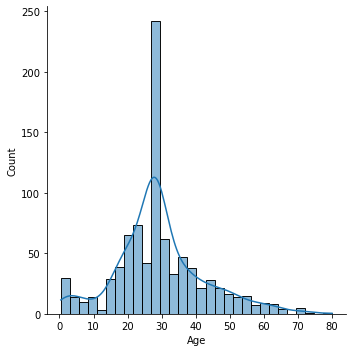

In [14]:
sns.displot(train['Age'], kde=True)

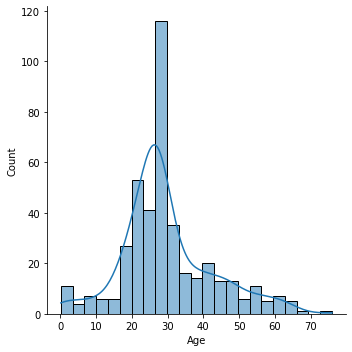

In [15]:
sns.displot(test['Age'], kde=True)

### Name
Tenemos que clasificar los nombres en títulos o "alías" de acuerdo al sexo y la edad, de esta forma no tendremos tantos valore únicos y la clasificación final será más acertada

In [9]:
def rename(age, sex):
    names = []
    for i, j in zip(age, sex):
        if i < 18:    
            if j == "female":
                names.append("Young Female")
            elif j == "male":
                names.append("Young Male") #agregar young female young male
        else:
            if j == "female":
                names.append("Mrs") 
            elif j == "male":
                names.append("Mr")
    return names 

In [10]:
train['Alias'] = rename(train["Age"], train["Sex"]) #Agregamos nueva columna con los nuevos datos
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alias
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Mrs
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [11]:
test['Alias'] = rename(test["Age"], test["Sex"]) #Agregamos nueva columna con los nuevos datos
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alias
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


Las columnas Name y Ticket se eliminan ya que no aportan datos relevantes

In [12]:
train.drop(['Name', 'Ticket'], axis = 1, inplace = True) 
test.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [20]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alias
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Mrs
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [21]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alias
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


### Embarked

Rellenamos los datos de Embarked usando el dato más frecuente

In [13]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

El valor que más se repite es "S" y solo hay 2 valores nulos, así que esos dos valores será reemplazados con "S"

In [13]:
train['Embarked'] = train['Embarked'].fillna('S')

In [26]:
test['Embarked'].mode()

0    S
dtype: object

In [14]:
test['Embarked'] = test['Embarked'].fillna('S')

## Calcular el valor de Fare basado en Pclass

In [15]:
test[test['Fare'].isnull() == True] 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alias
152,3,male,60.5,0,0,NaN,S,Mr


Tenemos que el dato faltante tiene un Pclass = 3, es decir que debe ser un precio de un boleto de tercera clase

In [16]:
test.groupby('Pclass').median()

,Age,SibSp,Parch,Fare
Pclass,,,,
1,39.0,0,0,60.0000
2,27.0,0,0,15.7500
3,27.0,0,0,7.8958


Lo rellenamos con la mediana de Fare en tercera clase

In [17]:
test['Fare'] = test['Fare'].fillna(7.8958)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Alias     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Alias     418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


## Codificamos los datos en clases de las columnas Sex, Pclass y Embarked 

/home/michell21/anaconda3/envs/practicasML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

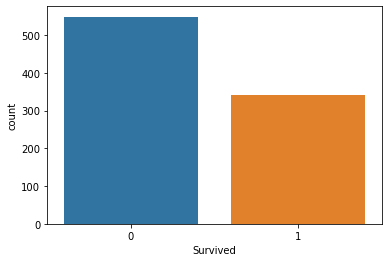

In [58]:
sns.countplot(train['Survived'])

In [95]:
columnas = ['Sex', 'Embarked', 'Alias']
train_enc = train.iloc[:,:]
enc = OneHotEncoder(handle_unknown='ignore')
#train_enc[columnas] = train_enc[columnas].apply(enc.fit_transform)
aux=enc.fit_transform(np.array(train_enc[columnas]).reshape(-1,1))

In [96]:
enc.categories_

[array(['C', 'Mr', 'Mrs', 'Q', 'S', 'Young Female', 'Young Male', 'female',
        'male'], dtype=object)]

In [100]:
columnas = ['Sex', 'Embarked', 'Alias']
le = LabelEncoder() #Usar OneHotEncoder
#En el train
train_enc = train.iloc[:,:]
train_enc[columnas] = train_enc[columnas].apply(le.fit_transform)
#En test
test_enc = test.iloc[:,:]
test_enc[columnas] = test_enc[columnas].apply(le.fit_transform)

In [101]:
train_enc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alias
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


In [38]:
test_enc.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alias
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1


## Dividimos las columnas en $X$ y $y$

In [110]:
y_train = train_enc['Survived']
X_train = train_enc.iloc[:,1:]

In [103]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alias
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [41]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [111]:
X_test = test_enc.iloc[:,:]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alias
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1


## Crear el modelo

In [106]:
model = DecisionTreeClassifier(random_state = 0, criterion = 'gini', max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

### Mostrar el árbol creado

In [107]:
def arbol(tree, data):
    fig, ax = plt.subplots(figsize=(26, 12))

    print("Profundidad del árbol: ", tree.get_depth())
    print("Número de nodos terminales: ", tree.get_n_leaves())

    plot = plot_tree(
                decision_tree = model,
                feature_names = data.columns.tolist(),
                class_names   = 'Survived',
                filled        = True,
                impurity      = False,
                fontsize      = 11,
                ax            = ax)

Profundidad del árbol:  5
Número de nodos terminales:  24


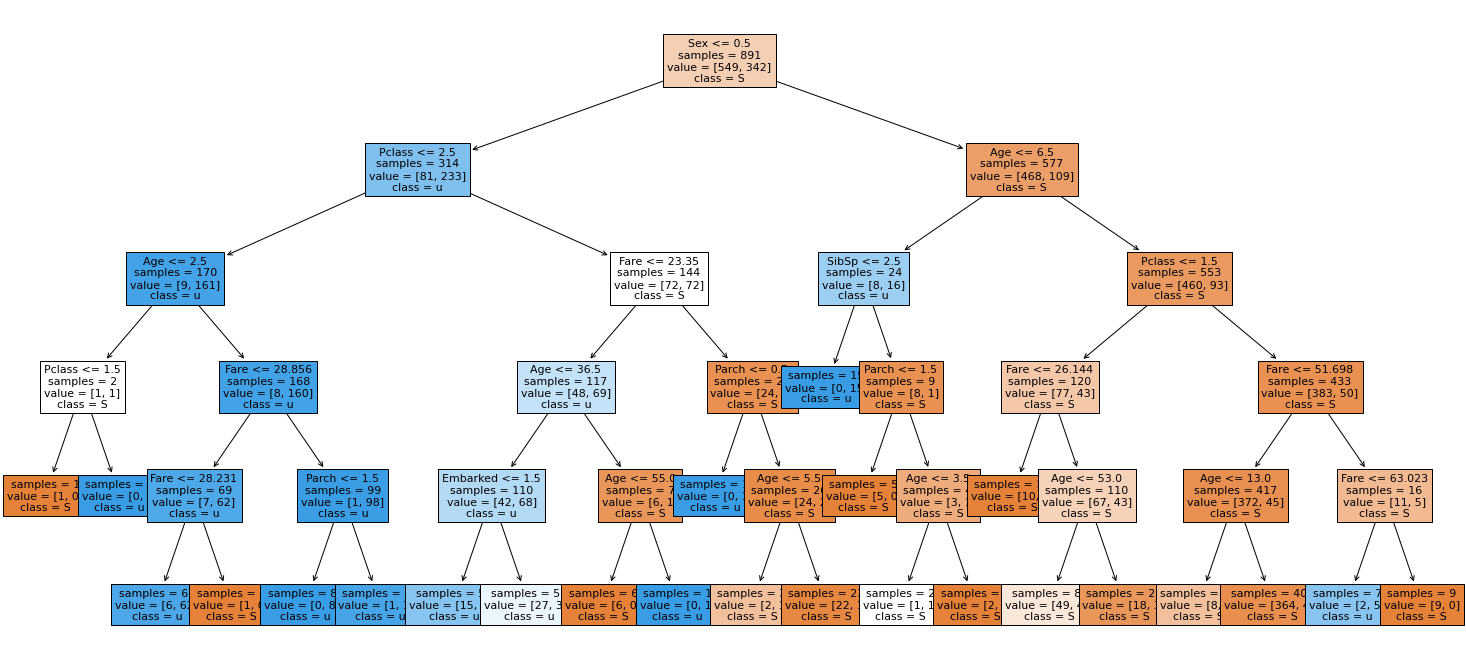

In [108]:
arbol(model, X_train)

### Predicciones

Tomamos los valores reales del dataset para compararlos con los valores de la predicción

In [104]:
def predicciones(tree, X, label):
    y_pred = tree.predict(X_test)
    y_true = label["Survived"]
    plot_confusion_matrix(tree, X, y_true)
    print("Accuracy = ", accuracy_score(y_true, y_pred))
    print("F1 Score = ", f1_score(y_true, y_pred))

Accuracy =  0.9569377990430622
F1 Score =  0.9400000000000001


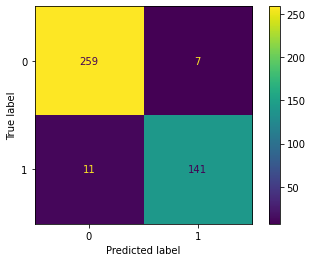

In [112]:
predicciones(model, X_test, gen)

# No sé si esto está bien
## Encontrar los mejores parámetros para el árbol

In [113]:
#parametros = {'random_state':[1,2,3,4,5,6,7,8,9,10], 'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10]} #,11,12,15,20,30,40,50,70,90,120,150
parametros = {'random_state':[1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)}
#Crear el estimador usando un árbol vacío
grid = GridSearchCV(DecisionTreeClassifier(), parametros, scoring = 'f1', cv=10)

In [114]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10),
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1')

In [67]:
import sklearn as sk
sk.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [115]:
scores = pd.DataFrame(grid.cv_results_)
gini = scores[scores['param_criterion'] == 'gini']
entropy = scores[scores['param_criterion'] == 'entropy']

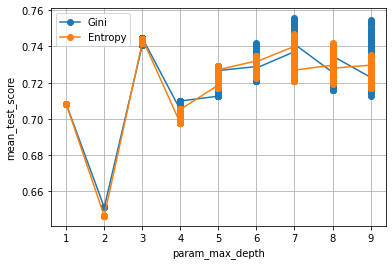

In [116]:
plt.plot(gini['param_max_depth'], gini['mean_test_score'],'o-')
plt.plot(entropy['param_max_depth'], entropy['mean_test_score'],'o-')
plt.xlabel('param_max_depth')
plt.ylabel('mean_test_score')
plt.legend(['Gini', 'Entropy'])
plt.grid(True)

In [65]:
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004763,0.000446,0.003010,0.000032,gini,1,1,2,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.804469,0.803371,0.786517,0.752809,0.786517,0.786737,0.018667,4481
1,0.004535,0.000005,0.002996,0.000010,gini,1,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.804469,0.803371,0.786517,0.752809,0.786517,0.786737,0.018667,4481
2,0.004515,0.000009,0.003013,0.000040,gini,1,1,2,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.804469,0.803371,0.786517,0.752809,0.786517,0.786737,0.018667,4481
3,0.004524,0.000020,0.002999,0.000069,gini,1,1,2,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.804469,0.803371,0.786517,0.752809,0.786517,0.786737,0.018667,4481
4,0.004540,0.000041,0.002933,0.000009,gini,1,1,2,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.804469,0.803371,0.786517,0.752809,0.786517,0.786737,0.018667,4481


In [117]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'random_state': 7}

In [119]:
model_final = grid.best_estimator_
print("Profundidad del árbol: ", model_final.get_depth())
print("Número de nodos terminales: ", model_final.get_n_leaves())

Profundidad del árbol:  7
Número de nodos terminales:  41


## NOTA: Revisar las diferentes métricas

Profundidad del árbol:  7
Número de nodos terminales:  41


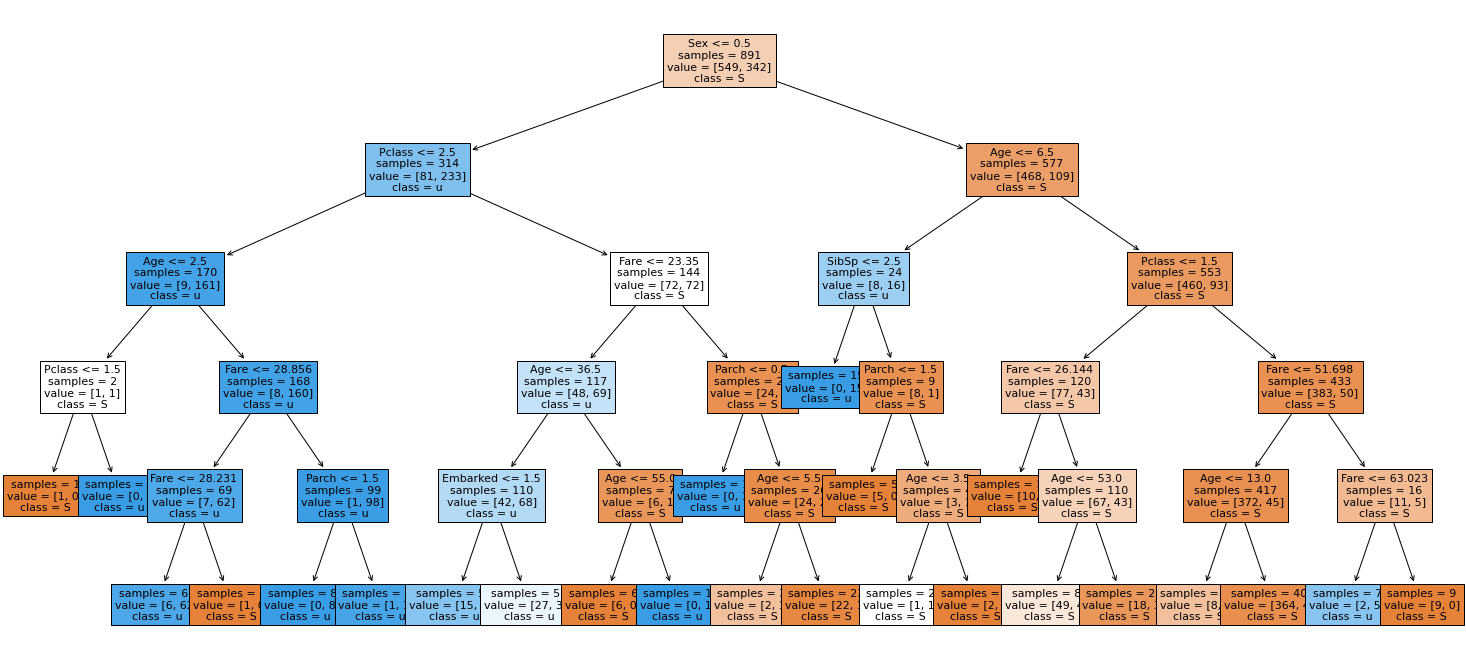

In [120]:
arbol(model_final, X_train)

Accuracy =  0.8660287081339713
F1 Score =  0.8041958041958042


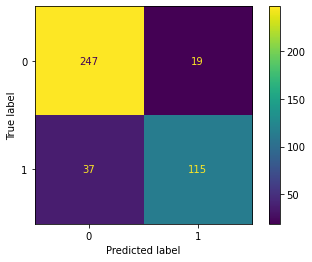

In [122]:
predicciones(model_final, X_test, gen)

In [60]:
final_predictions = pd.DataFrame({'PassengerId': gen['PassengerId'], 'Survived': predicciones}, dtype=int)
final_predictions.to_csv('final_predictions.csv', index=False)

# Agregar nuevos datos para hacer nuevas predicciones